In [ ]:
import numpy as np
import torch
import pandas as pd

import torch.nn as nn

import torch.optim as optim

import torch.nn.init as init

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("weight_height_info.csv")

num_data = 4545
num_epoch = 2500

noise = init.normal_(torch.FloatTensor(num_data,1), std=0.2)

x = data['height_cm'].to_list()
y = data['weight_kg'].to_list()

x = torch.FloatTensor(x).unsqueeze(1)
x = (x - x.mean()) / x.std()

y = torch.FloatTensor(y).unsqueeze(1)
y = (y - y.mean()) / y.std()

y_noise = y + noise

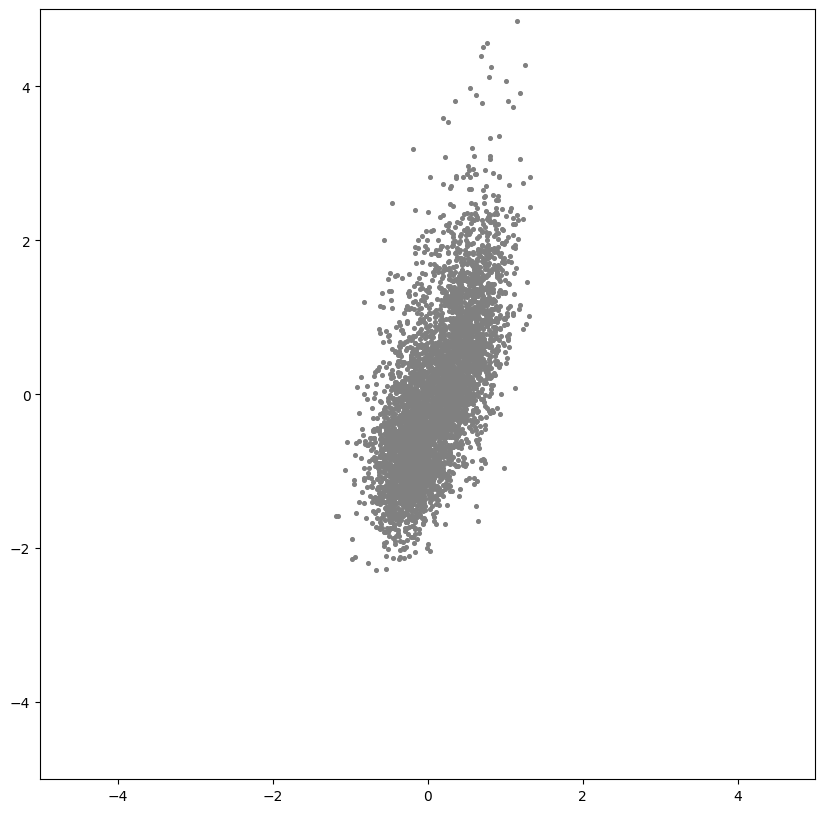

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(x.numpy(), y_noise.numpy(), s=7, c="gray")

plt.axis([-5,5,-5,5])

plt.show()

In [ ]:
model = nn.Linear(1,1)

loss_func = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

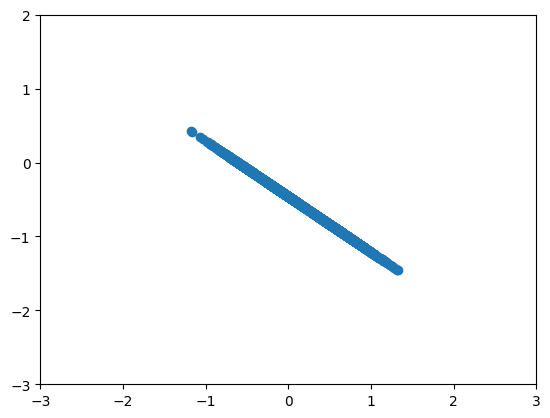

tensor(2.1720)


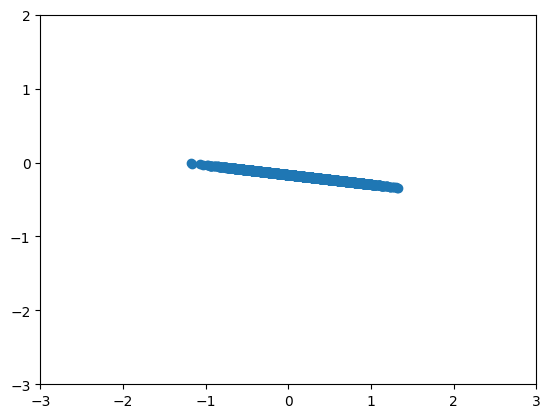

tensor(1.1560)


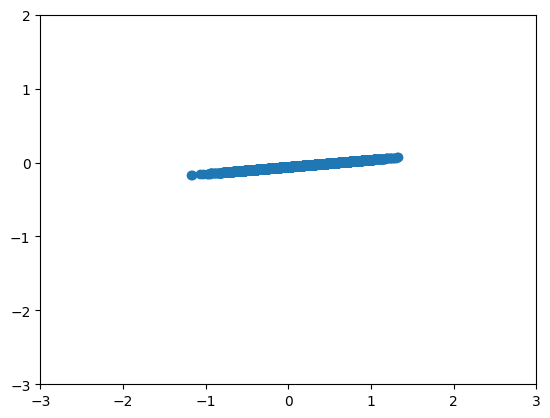

tensor(1.0212)


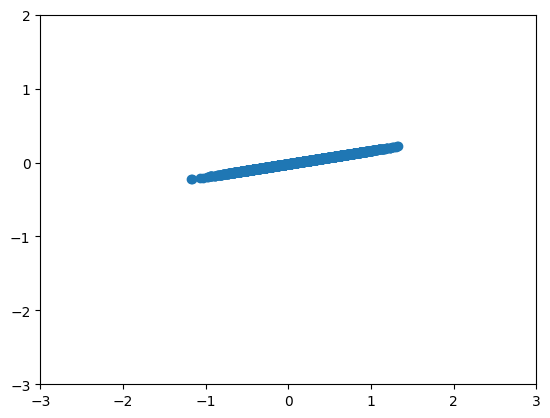

tensor(1.0034)


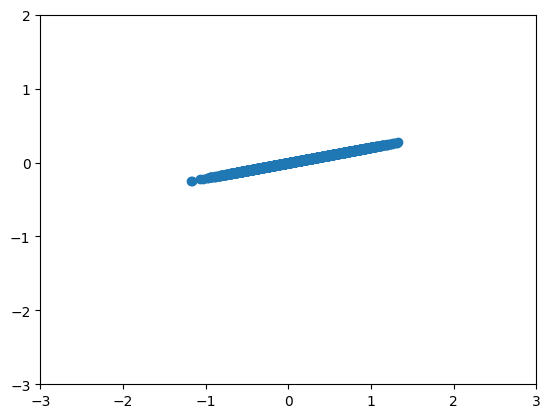

tensor(1.0010)


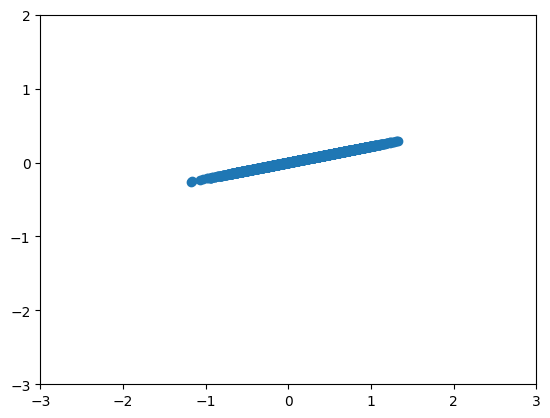

tensor(1.0007)


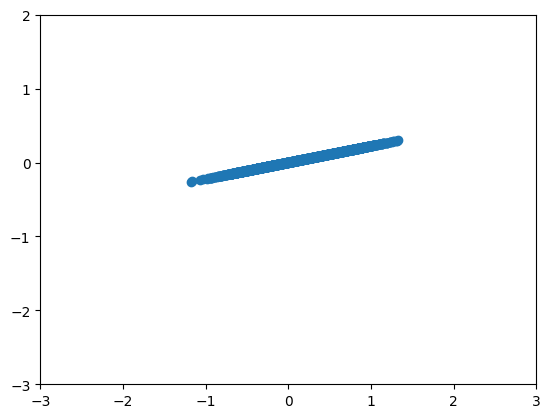

tensor(1.0006)


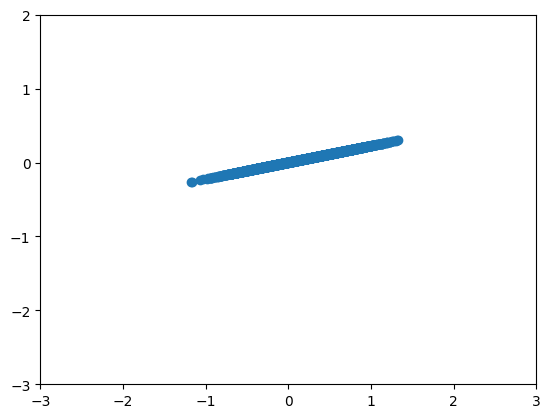

tensor(1.0006)


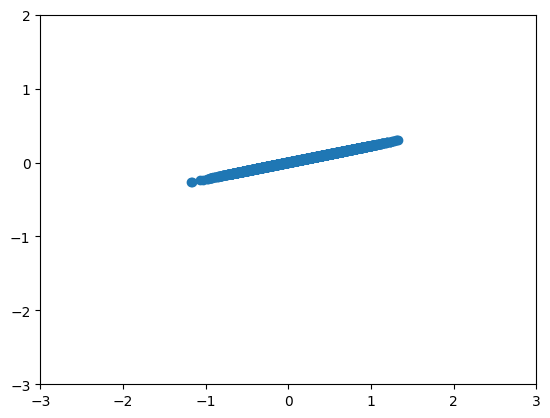

tensor(1.0006)


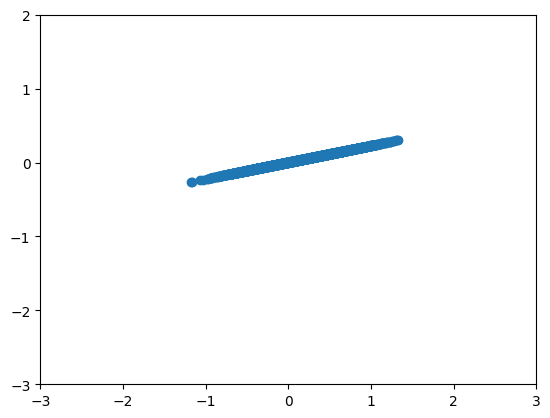

tensor(1.0006)


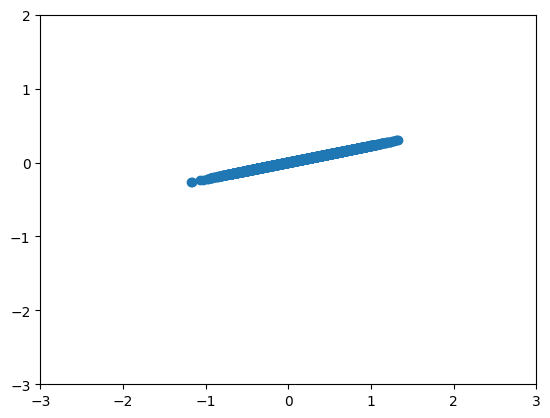

tensor(1.0006)


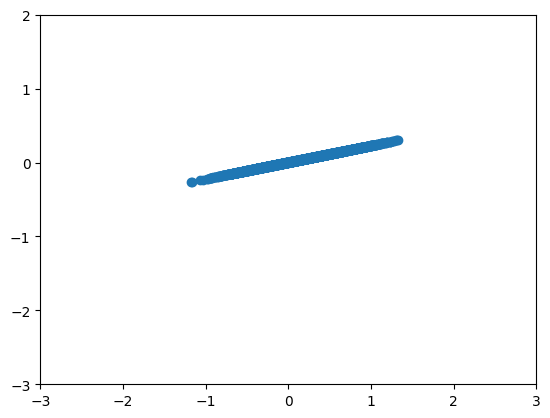

tensor(1.0006)


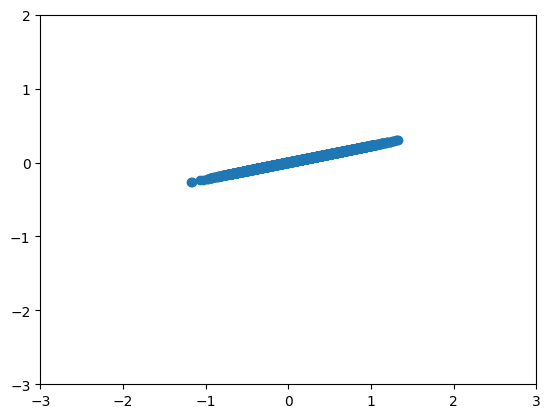

tensor(1.0006)


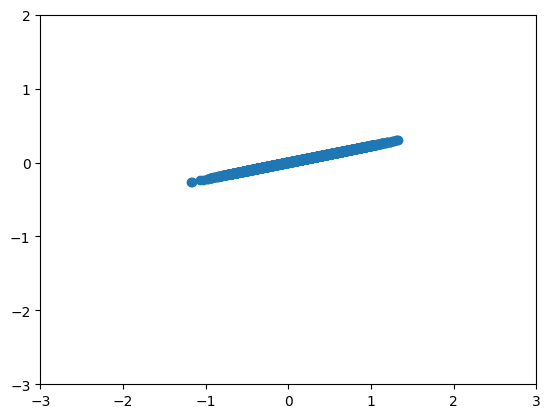

tensor(1.0006)


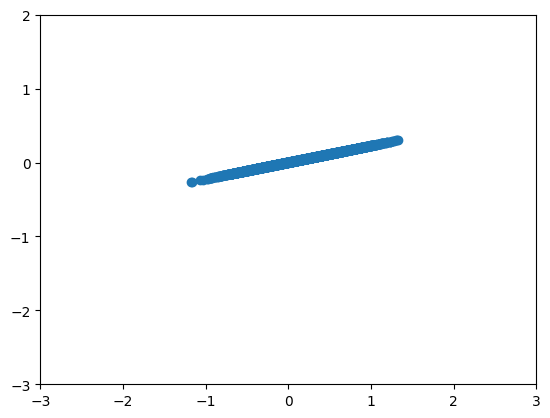

tensor(1.0006)


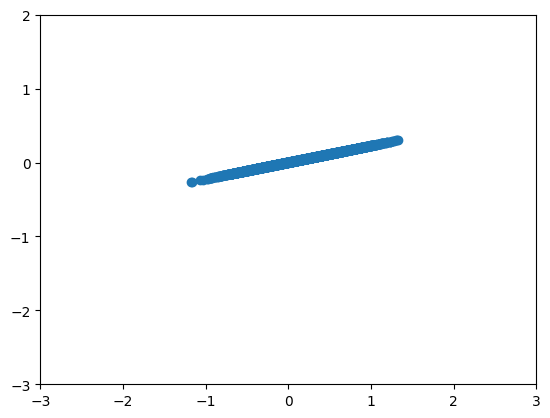

tensor(1.0006)


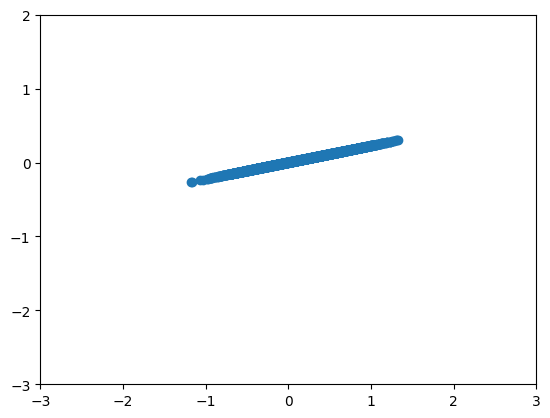

tensor(1.0006)


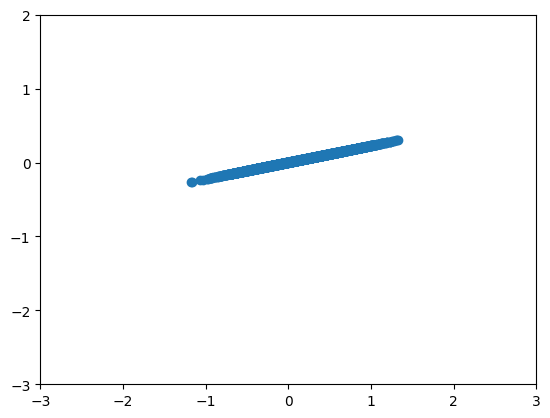

tensor(1.0006)


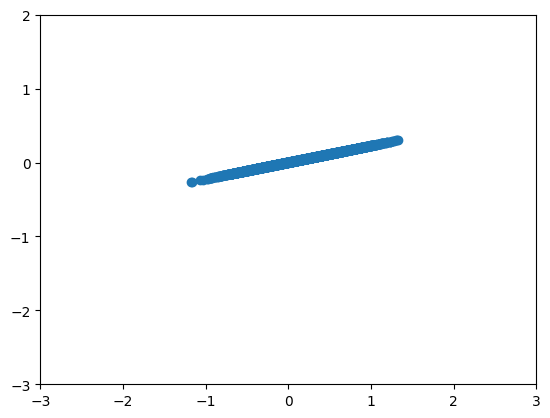

tensor(1.0006)


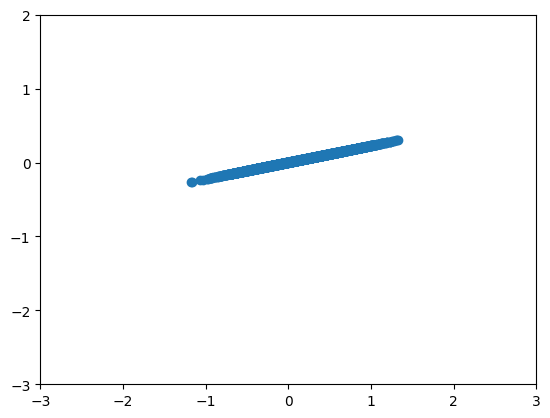

tensor(1.0006)


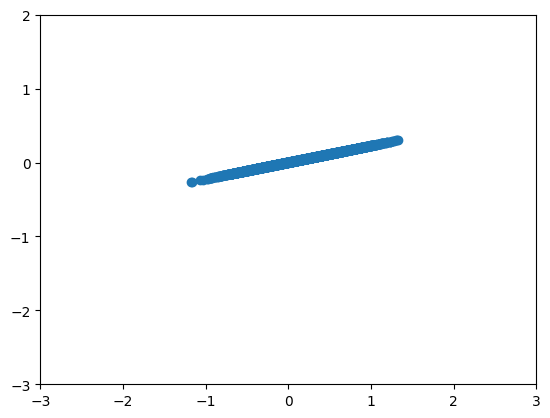

tensor(1.0006)


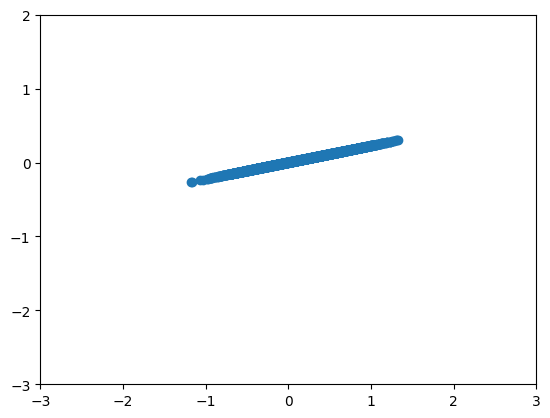

tensor(1.0006)


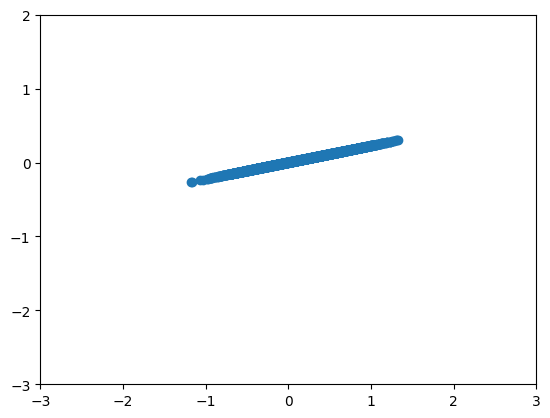

tensor(1.0006)


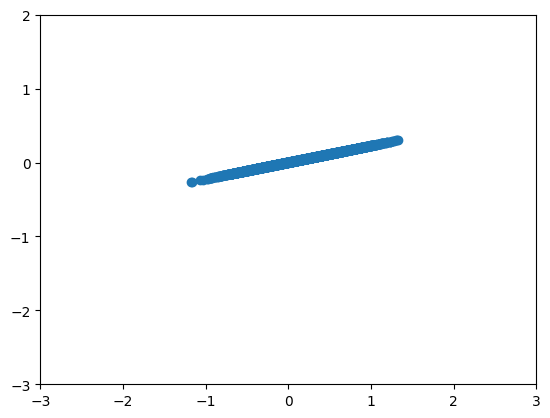

tensor(1.0006)


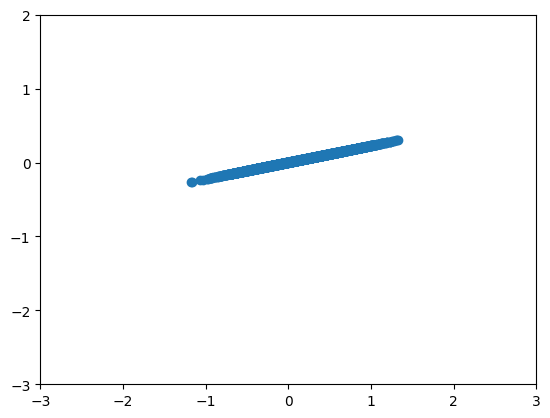

tensor(1.0006)


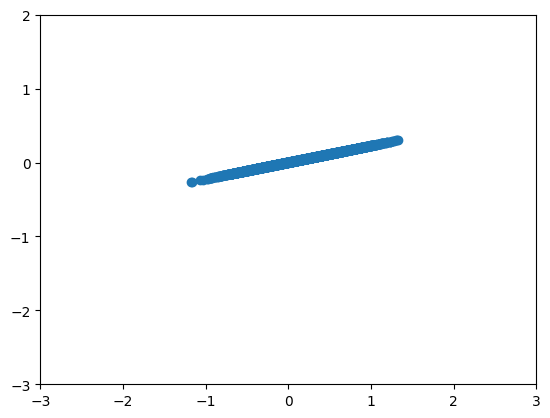

tensor(1.0006)


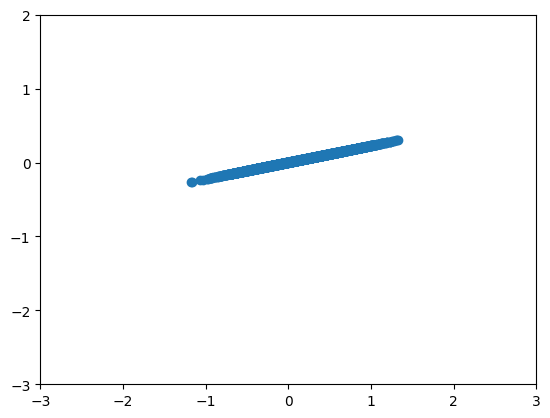

tensor(1.0006)


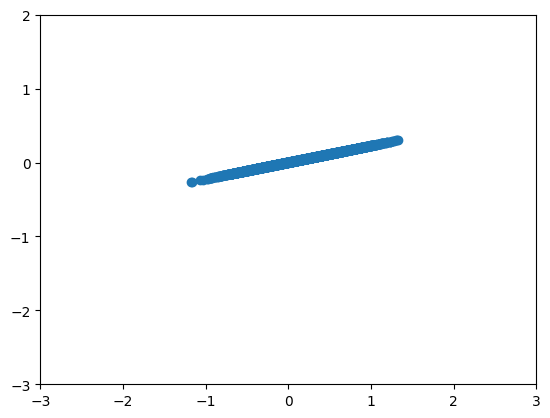

tensor(1.0006)


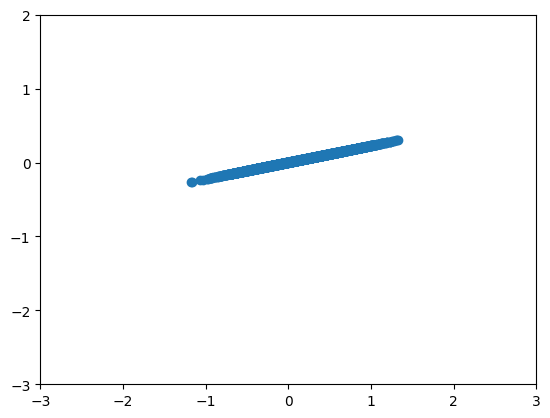

tensor(1.0006)


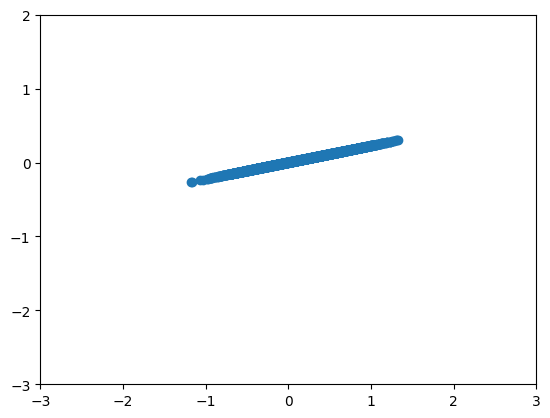

tensor(1.0006)


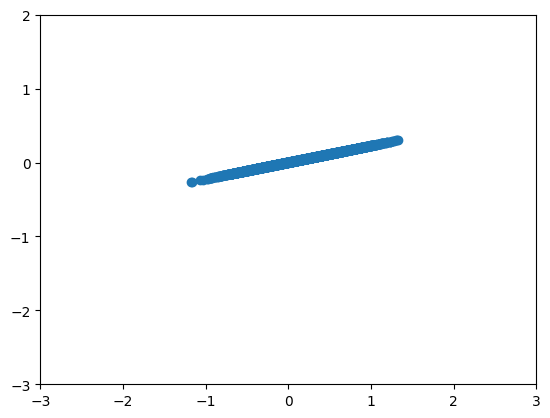

tensor(1.0006)


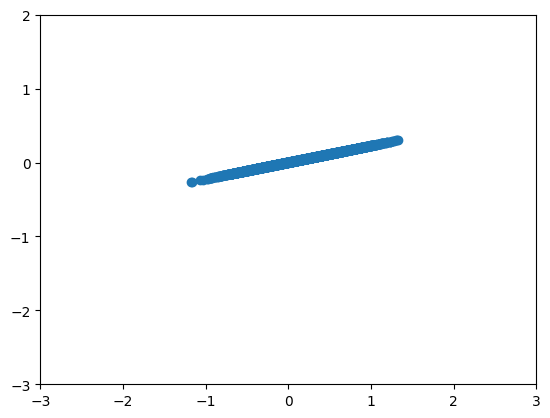

tensor(1.0006)


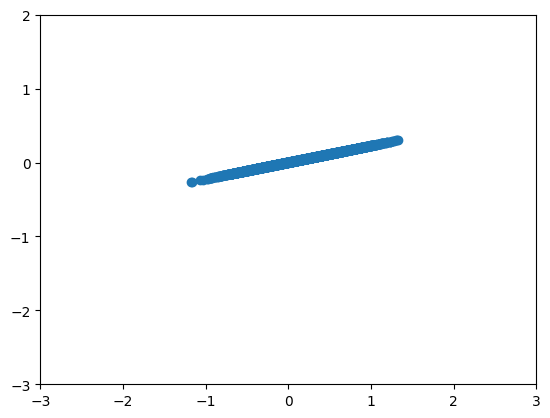

tensor(1.0006)


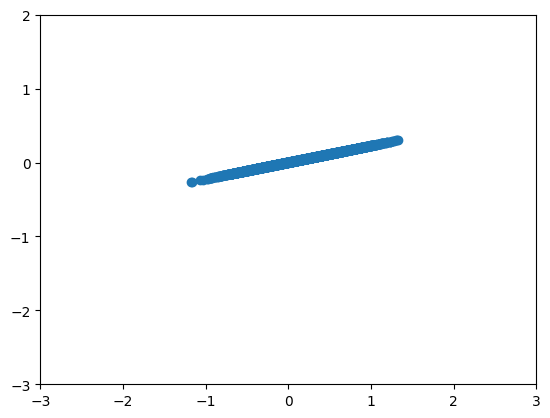

tensor(1.0006)


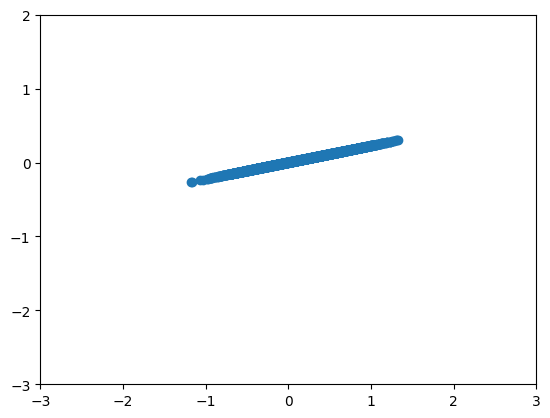

tensor(1.0006)


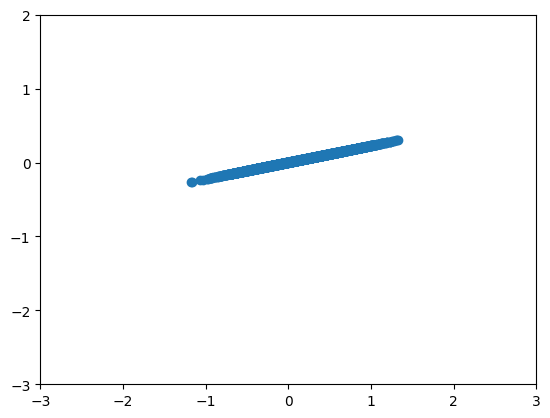

tensor(1.0006)


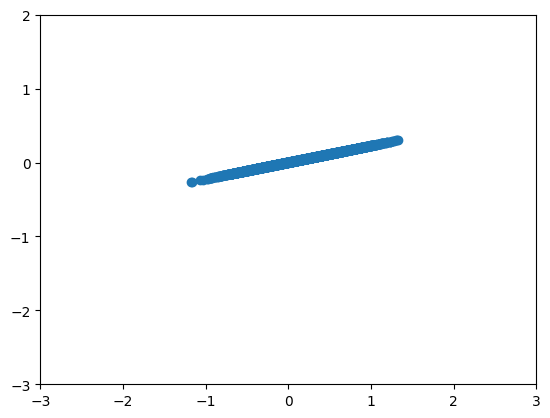

tensor(1.0006)


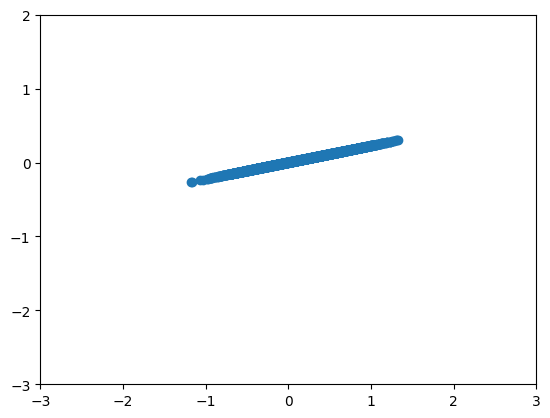

tensor(1.0006)


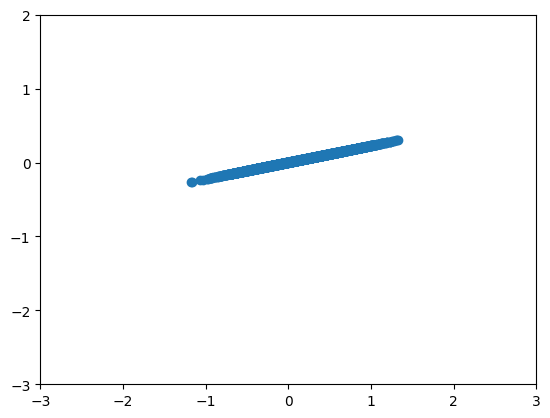

tensor(1.0006)


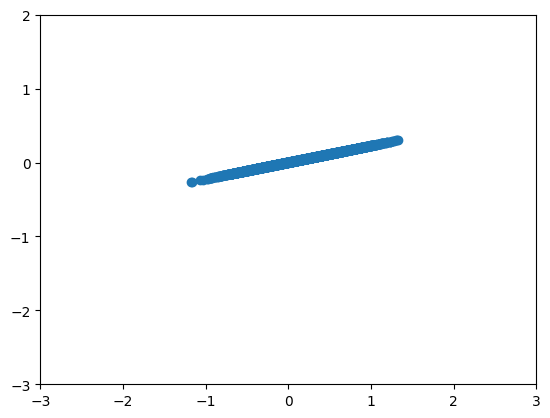

tensor(1.0006)


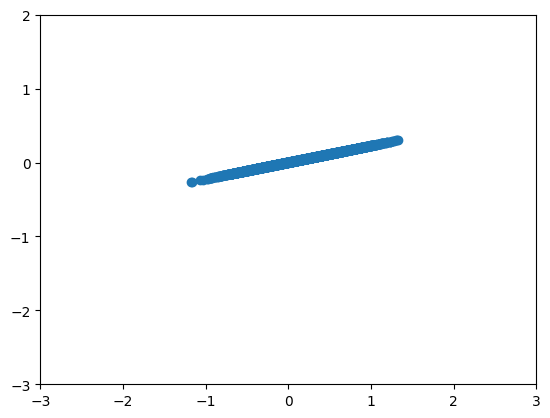

tensor(1.0006)


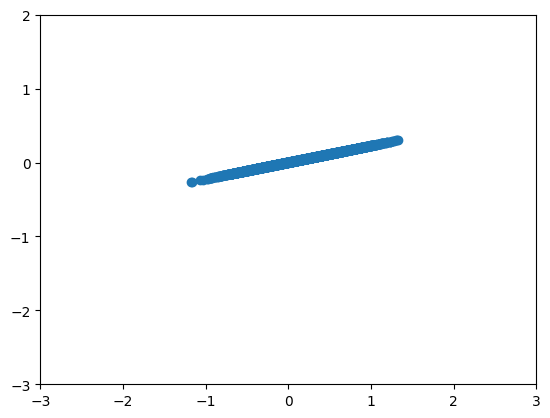

tensor(1.0006)


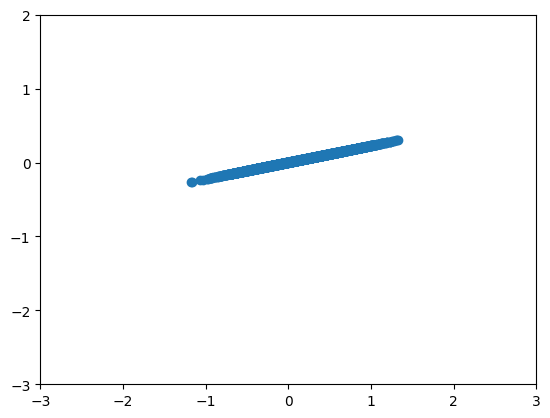

tensor(1.0006)


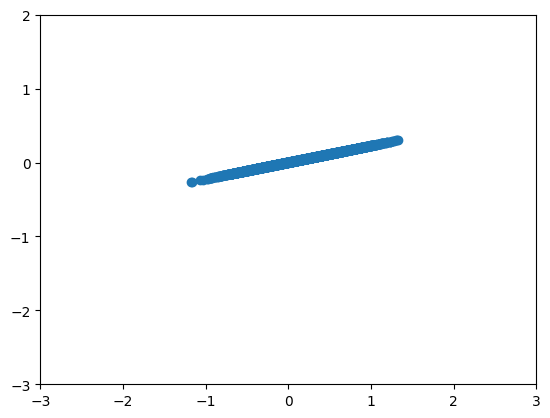

tensor(1.0006)


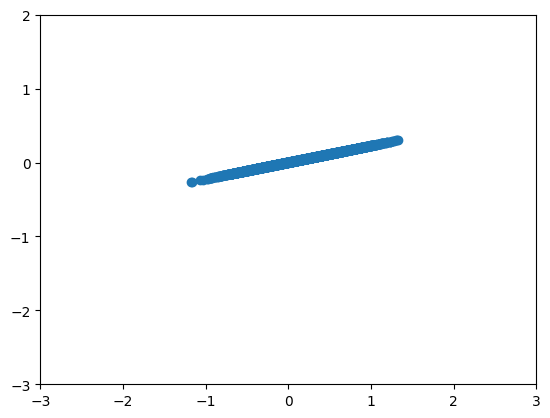

tensor(1.0006)


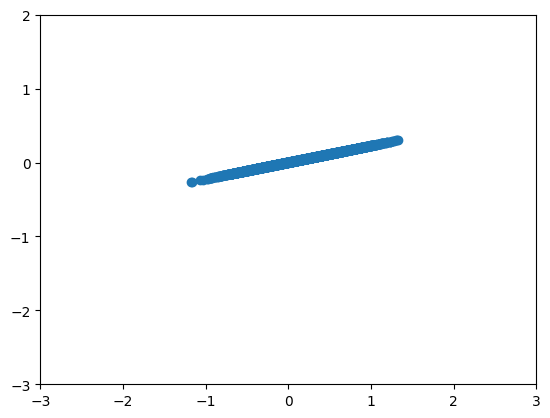

tensor(1.0006)


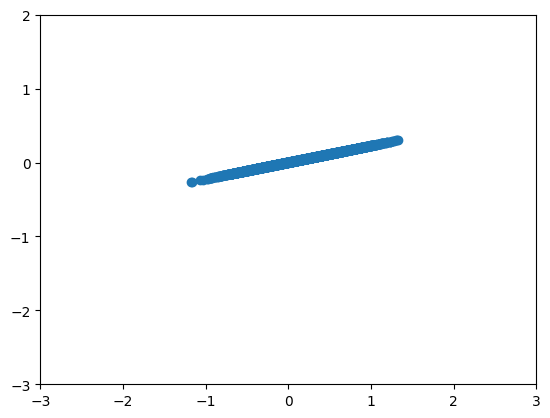

tensor(1.0006)


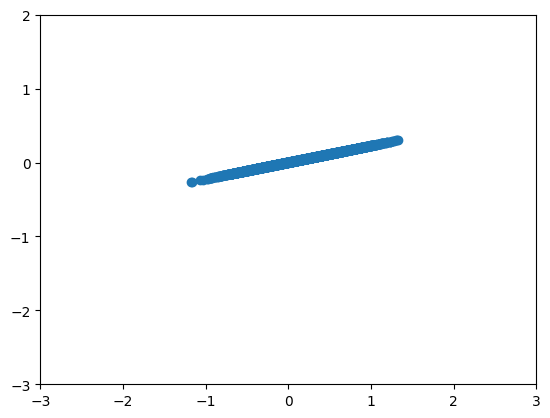

tensor(1.0006)


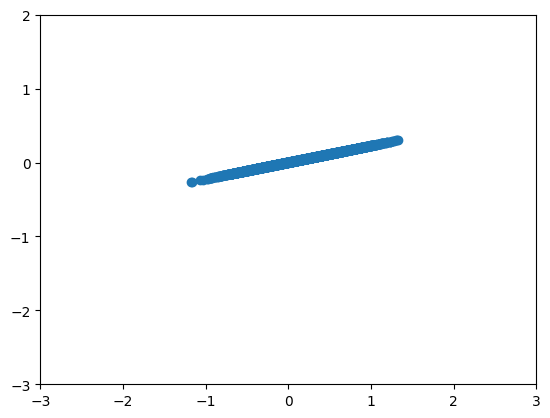

tensor(1.0006)


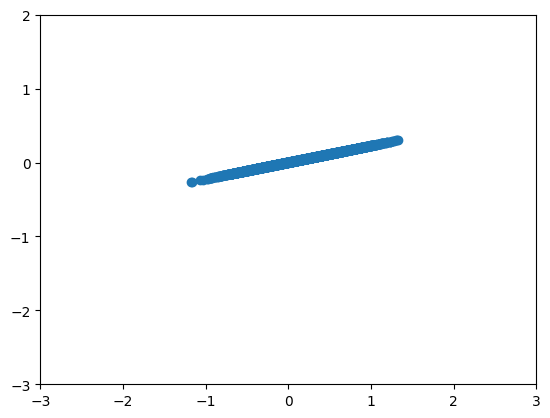

tensor(1.0006)
tensor(1.0006, grad_fn=<MseLossBackward0>)


In [ ]:
loss_arr=[]

label = y_noise

for i in range(num_epoch):

  optimizer.zero_grad()

  output = model(x)

  loss = loss_func(output, label)

  loss.backward()

  optimizer.step()

  if i % 50 == 0:

    plt.scatter(x.detach().numpy(), output.detach().numpy())
    plt.axis([-3,3,-3,2])
    plt.show()
    print(loss.data)

  loss_arr.append(loss.detach().numpy())


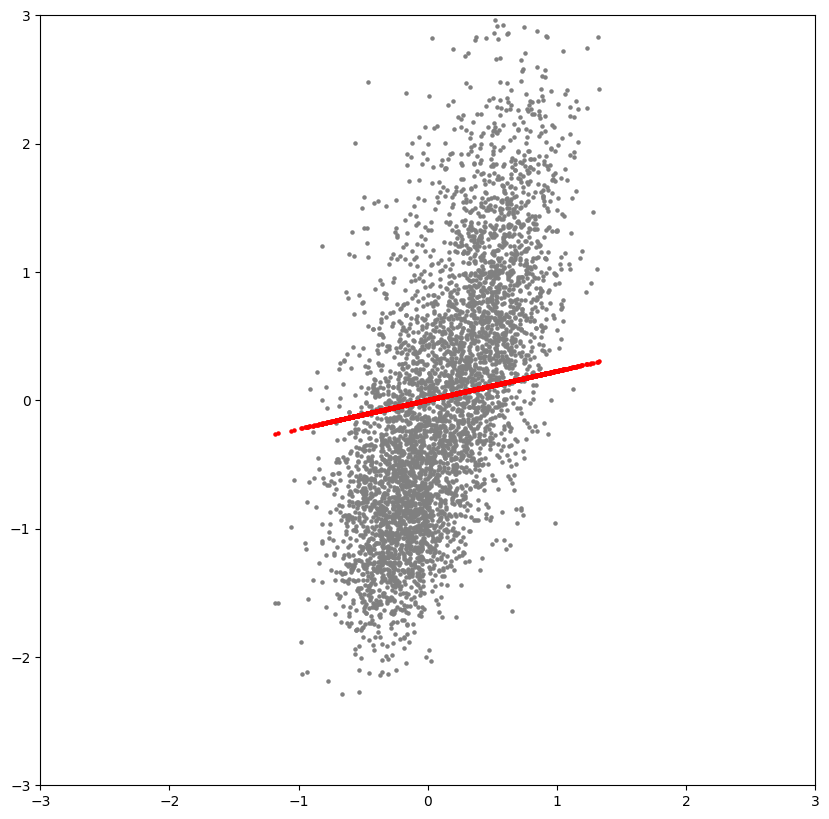

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x.numpy(), y_noise.numpy(), s=5, c='gray')
plt.scatter(x.detach().numpy(), output.detach().numpy(), s=5, c='red')
plt.axis([-3,3,-3,3])
plt.show()

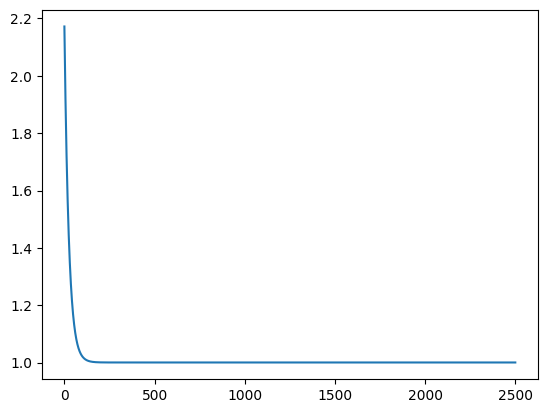

In [ ]:
plt.plot(loss_arr)
plt.show()

In [ ]:
param_list = list(model.parameters())
print("Weight: ", param_list[0].item(), "\nBias: ", param_list[1].item())

Weight:  0.22563453018665314 
Bias:  0.0034015646670013666
